# Visualizations of results

Various visualizations of results made during model development and experimentation.

In [2]:
import numpy as np
import pandas as pd
import torch
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, max_error, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

## Loading results

In [3]:
A = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_A_only.pth")
B = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_B_only.pth")
C = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_C_only.pth")
C_discharge_redo = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_redocapacityNY_C_only.pth")

A_soc = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_soc_A_only.pth")
B_soc = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_soc_B_only.pth")
C_soc = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_soc_C_only.pth")
D_soc = torch.load("../../results/RESULTS_xgboost_cells_D/bootstrap_results_D_only_with_P-I.pth")

A_safety_1c = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_outlier_A_only.pth")
B_safety_1c = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_outlier_B_only.pth")
C_safety_1c = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_outlier_C_only.pth")

A_safety_c_2 = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_c_2_A_only.pth")
B_safety_c_2 = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_c_2_B_only.pth")
C_safety_c_2 = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_c_2_C_only.pth")

A_capacity_bins = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_capacity_bins_A_only.pth")
B_capacity_bins = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_capacity_bins_B_only.pth")
C_capacity_bins = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_capacity_bins_C_only.pth")

A_safety_weighting_and_cap_3bins = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_capacity3bins_A_only.pth")
B_safety_weighting_and_cap_3bins = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_capacity3bins_B_only.pth")
C_safety_weighting_and_cap_3bins = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_capacity3bins_C_only.pth")

A_extracted = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_extracted_features_A_only.pth")
B_extracted = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_extracted_features_B_only.pth")
C_extracted = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_extracted_features_C_only.pth")

global_results = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_full_dataset.pth")
global_results_soc = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_soc_full_dataset.pth")

safety_probabilities_A = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_outlier_probabilities_A_only.pth")
safety_probabilities_B = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_outlier_probabilities_B_only.pth")
safety_probabilities_C = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_safety_outlier_probabilities_C_only.pth")

A_benchmark = torch.load("../../results/experiment_3_features_V_V0-I_T/bootstrap_results_A_only.pth")
B_benchmark = torch.load("../../results/experiment_3_features_V_V0-I_T/bootstrap_results_B_only.pth")
C_benchmark = torch.load("../../results/experiment_3_features_V_V0-I_T/bootstrap_results_C_only.pth")

D = torch.load("../../results/RESULTS_xgboost_cells_D/bootstrap_results_D_only_with_P-I.pth")

A_volume = torch.load("../../results/RESULTS_xgboost_cells_A-D_physical_targets/bootstrap_results_A.pth")
C_volume = torch.load("../../results/RESULTS_xgboost_cells_A-D_physical_targets/bootstrap_results_C.pth")
D_volume = torch.load("../../results/RESULTS_xgboost_cells_A-D_physical_targets/bootstrap_results_D.pth")

C_elec = torch.load("../../results/RESULTS_xgboost_cells_A-D_physical_targets/bootstrap_results_electrolyte_C.pth")
D_elec = torch.load("../../results/RESULTS_xgboost_cells_A-D_physical_targets/bootstrap_results_electrolyte_D.pth")

A_safety_maxerr = torch.load("../../results/experiment_safety_max_error/bootstrap_results_A_only.pth")
B_safety_maxerr = torch.load("../../results/experiment_safety_max_error/bootstrap_results_B_only.pth")

## Plot titles

In [8]:
TARGETS_TO_NAMES = {
    "1C discharge capacity": "1C discharge\ncapacity",
    "C/10 discharge capacity": "C/10",
    "C/5 discharge capacity": "C/5",
    "C/3 discharge capacity": "C/3 discharge\ncapacity",
    "C/2 discharge capacity": "C/2",
    "P/3 discharge capacity": "P/3",
    "Charge depleting cycle charge throughput": "Charge depleting\ncycle charge\nthroughput",
    "Charge sustaining cycle charge efficiency": "Charge sustaining\ncycle charge\nefficiency",
    "Post 1C charge relaxation fit MSE": "Post 1C charge\nrelaxation fit MSE",
    "soc": "SOC",
}

## Helper functions for plotting

In [10]:
def get_r2s_all_targets(pulses, targets, results_dict, results_dict_soc, cell_type=None, color='blue', n_splits=50, plot=True):    

    r2s, maes = {pulse: [] for pulse in pulses}, {pulse: [] for pulse in pulses}
    for i, pulse in enumerate(pulses):
        for j, target in enumerate(targets):
            df = results_dict[f"{target}, {pulse}"]
            
            if cell_type is not None:
                df = df[df['cell_id'].str.startswith(cell_type)]

            for run in range(n_splits):
                test_subset = df[df[run].notna()]
                r2 = r2_score(test_subset[target], test_subset[run])
                mae = mean_absolute_error(test_subset[target], test_subset[run])
                r2s[pulse].append(r2)
                maes[pulse].append(mae)
                
        df = results_dict_soc[f"soc, {pulse}"]

        if cell_type is not None:
            df = df[df['cell_id'].str.startswith(cell_type)]

        for run in range(n_splits):
            test_subset = df[df[run].notna()]
            r2 = r2_score(test_subset[target], test_subset[run])
            mae = mean_absolute_error(test_subset[target], test_subset[run])
            r2s[pulse].append(r2)
            maes[pulse].append(mae)
    
    return r2s, maes

def prep_for_box(scores, pulses):
    a = []
    for pulse in pulses:
        a.append(scores[pulse])
    return a

In [11]:
def plot_scatter_one_target(pulses, targets, results_dict, cell_type=None, color='blue', n_splits=50, plot=True):
    r2s_mean = []
    maes_mean = []
    mapes_mean = []
    
    r2s_std = []
    maes_std = []
    mapes_std = []
    
    for i, pulse in enumerate(pulses):
        for j, target in enumerate(targets):
            df = results_dict[f"{target}, {pulse}"]
            
            if cell_type is not None:
                df = df[df['cell_id'].str.startswith(cell_type)]

            r2s, maes, mapes = [], [], []
            for run in range(n_splits):
                test_subset = df[df[run].notna()]
                r2 = r2_score(test_subset[target], test_subset[run])
                mae = mean_absolute_error(test_subset[target], test_subset[run])
                mape = mean_absolute_percentage_error(test_subset[target], test_subset[run])
                r2s.append(r2)
                maes.append(mae)
                mapes.append(mape)

            r2s_mean.append(np.mean(r2s))
            maes_mean.append(np.mean(maes))
            mapes_mean.append(np.mean(mapes))
            r2s_std.append(np.std(r2s))
            maes_std.append(np.std(maes))
            mapes_std.append(np.std(mapes))

    if plot:
        plt.errorbar(x=pulses, y=r2s_mean, yerr=r2s_std, capsize=5, fmt='bo', color=color)
        plt.ylabel(r'R$^2_{Test}$', size='xx-large')
        plt.xticks(rotation=45, size='xx-large')
        plt.yticks(size='xx-large')
        plt.show()

        plt.errorbar(x=pulses, y=maes_mean, yerr=maes_std, capsize=5, fmt='bo', color=color)
        plt.ylabel(r'$MAE_{Test}$', size='xx-large')
        plt.xticks(rotation=45, size='xx-large')
        plt.yticks(size='xx-large')
        plt.show()
    
    return {'r2': {'mean': r2s_mean, 'std': r2s_std},
            'mae': {'mean': maes_mean, 'std': maes_std},
            'mape': {'mean': mapes_mean, 'std': mapes_std}}

In [36]:
def plot_true_vs_pred_axis(ax, pulse, target, result_dict, color='blue', n_splits=50, title=''):
    df = result_dict[f"{target}, {pulse}"]
    average_pred = df[list(range(n_splits))].mean(axis=1)
    sns.histplot(x=df[target],
        y=average_pred,
        stat='percent',
        bins=30,
        color=color,
        ax=ax)
    ax.axline( (df[target].min(), df[target].min()),
                       (df[target].max(), df[target].max()),
                     linestyle='dashed', color='gray')
    ax.set_title(title)
    
def plot_true_vs_pred(pulse, target, result_dict, color='blue', n_splits=50):
    fig = plt.figure()
    df = result_dict[f"{target}, {pulse}"]
    
    average_pred = df[list(range(n_splits))].mean(axis=1)

    sns.histplot(x=df[target],
        y=average_pred,
        stat='percent',
        bins=30,
        color=color)
        # s=2)
    plt.axline( (df[target].min(), df[target].min()),
                       (df[target].max(), df[target].max()),
                     linestyle='dashed', color='gray')

    plt.title(f"Predicting {target} from {pulse}", size='xx-large')
    plt.xlabel("Actual", size='xx-large')
    plt.ylabel("Predicted", size='xx-large')
    plt.show()
    
    if target.endswith("threshold"):
        print(classification_report(df[target], average_pred.round()))
        
    else:
        print('r2 score: ', r2_score(df[target], average_pred))
        print('mae score: ', mean_absolute_error(df[target], average_pred))
        print('max error: ', max_error(df[target], average_pred))

In [13]:
def get_classification_scores(pulse, target, result_dict, display_labels=[], n_splits=50, xlabel='', ylabel=''):
    df = result_dict[f"{target}, {pulse}"]
    average_pred = df[list(range(n_splits))].max(axis=1)
    print(classification_report(df[target], average_pred.round()))
    cm = confusion_matrix(df[target], average_pred.round())
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

In [30]:
def plot_residuals(pulse, target, color_by, result_dict, color='blue', n_splits=50):
    
    plt.figure()
    
    df = result_dict[f"{target}, {pulse}"]
    average_pred = df[list(range(n_splits))].mean(axis=1)
    
    sns.histplot(x=df[color_by], y=df[target] - average_pred,
                stat='percent', bins=30, color=color)
    if color_by != 'rate':
        x0 = df[color_by].min()
        plt.axline(
            (x0,0),
            slope=0,
            linestyle='dashed',
            color='red'
        )
    
    plt.xlabel(color_by, size='xx-large')
    plt.ylabel("Residual Error", size='xx-large')
    plt.tight_layout()
    plt.show()
    
    
def custom_round(x, base=5):
    return base * round(float(x)/base)
    
def plot_residuals_errorbar(pulse, target, color_by, result_dict, color='blue', n_splits=50):
    # Makes most sense for 'rate'
    plt.figure()
    
    df = result_dict[f"{target}, {pulse}"]
    average_pred = df[list(range(n_splits))].mean(axis=1)
    df['target-average_pred'] = df[target] - average_pred
    
    if 'temperature' in color_by:
        df[color_by] = df[color_by].apply(lambda x: custom_round(x, base=15))
    
    means = df[[target, color_by, 'target-average_pred']].groupby(color_by).mean()
    stds = df[[target, color_by, 'target-average_pred']].groupby(color_by).std()
    
    plt.errorbar(x=means.index, y=means['target-average_pred'], yerr=stds['target-average_pred'], color=color,
                capsize=5, fmt='bo')
    plt.plot(means.index, [0] * len(means), color='red', linestyle='dashed')
    if color_by != 'rate':
        x0 = df[color_by].min()
        plt.axline(
            (x0,0),
            slope=0,
            linestyle='dashed',
            color='red'
        )  
    plt.xlabel(color_by) # , size='xx-large')
    plt.ylabel("Residual Error") #, size='xx-large')
    plt.tight_layout()
    plt.show()

In [37]:
def get_table_multiple_chemistries(pulse, target, A, B, C, n_splits=50):
    df_A = A[f"{target}, {pulse}"]
    df_B = B[f"{target}, {pulse}"]
    df_C = C[f"{target}, {pulse}"]
    
    table = {r'$R^2$': [], 'MAE': [], 'Maximum error': []}
    for df in [df_A, df_B, df_C]:
        r2s, maes, max_errors = [], [], []
        for run in range(n_splits):
            test_subset = df[df[run].notna()]
            r2 = r2_score(test_subset[target], test_subset[run])
            mae = mean_absolute_error(test_subset[target], test_subset[run])
            max_e = max_error(test_subset[target], test_subset[run])
            r2s.append(r2)
            maes.append(mae)
            max_errors.append(max_e)

        table[r'$R^2$'].append(np.mean(r2s))
        table['MAE'].append(np.mean(maes))
        table['Maximum error'].append(np.mean(max_errors))

    return pd.DataFrame(table, index=["A", "B", "C"])

In [38]:
def plot_heatmap(pulses, targets, results_dict, metric='r2', display=True, n_runs=50, ax=None):
    r2_heatmap = np.zeros((len(pulses), len(targets)))
    mae_heatmap = np.zeros((len(pulses), len(targets)))

    for i, pulse in enumerate(pulses):
        for j, target in enumerate(targets):
            df = results_dict[f"{target}, {pulse}"]

            r2s, maes, rmses = [], [], []
            for run in range(n_runs):
                test_subset = df[df[run].notna()]
                r2 = r2_score(test_subset[target], test_subset[run])
                mae = mean_absolute_error(test_subset[target], test_subset[run])
                r2s.append(r2)
                maes.append(mae)

            r2_heatmap[i][j] = np.mean(r2s)
            mae_heatmap[i][j] = np.mean(maes)

    if metric == 'r2':
        heatmap = r2_heatmap
        label= r'Average R$^2$'
    else:
        heatmap = mae_heatmap
        label = r'Average $MAE$'
        
    if display:
        if ax is None:
            fig, ax = plt.subplots(1,1, figsize=(6,6))

        sns.heatmap(heatmap,
            cmap='viridis',
            cbar_kws={'label': label},
            xticklabels=[TARGETS_TO_NAMES[t] for t in targets],
            annot=True,
            yticklabels=pulses,
            ax=ax,
        )
        ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=45,
            horizontalalignment='right'
        );
    
    return heatmap

## Plot distribution of scores per pulse type, all targets

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1220810420.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot((np.array(r2s_c) + np.array(r2s_a) + np.array(r2s_b)).tolist(), labels=pulses, showfliers=False);
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1220810420.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot((np.array(maes_c) + np.array(maes_a) + np.array(maes_b)).tolist(), labels=pulses, showfliers=False);


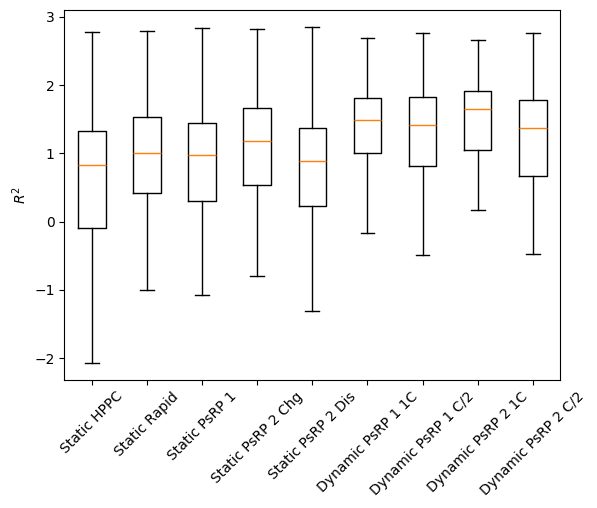

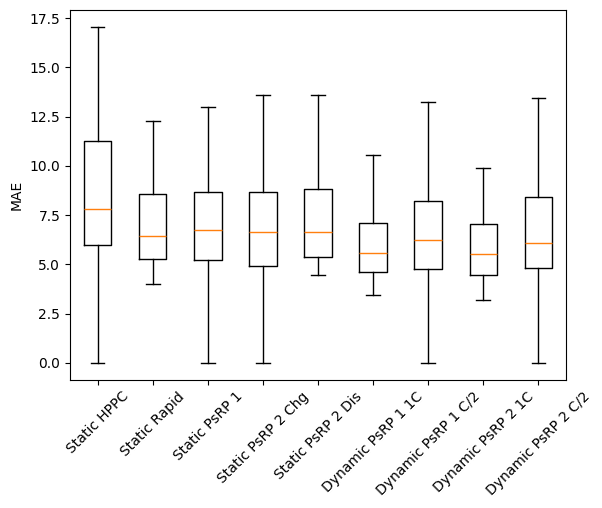

In [17]:
targets = [
 'C/2 discharge capacity',
 'Charge sustaining cycle charge efficiency',
 'C/10 discharge capacity',
 'Charge depleting cycle charge throughput',
 '1C discharge capacity',
 'C/5 discharge capacity',
 'C/3 discharge capacity']

pulses = [
     'Static HPPC',
     'Static Rapid',
     'Static PsRP 1',
     'Static PsRP 2 Chg',
     'Static PsRP 2 Dis',

     'Dynamic PsRP 1 1C',
     'Dynamic PsRP 1 C/2',
    'Dynamic PsRP 2 1C',
     'Dynamic PsRP 2 C/2']

r2s_all_A, maes_all_A = get_r2s_all_targets(pulses, targets, A, A_soc)
r2s_all_B, maes_all_B = get_r2s_all_targets(pulses, targets, B, B_soc)
r2s_all_C, maes_all_C = get_r2s_all_targets(pulses, targets, C, C_soc)
        
r2s_a = prep_for_box(r2s_all_A, pulses)
maes_a = prep_for_box(maes_all_A, pulses)
r2s_b = prep_for_box(r2s_all_B, pulses)
maes_b = prep_for_box(maes_all_B, pulses)
r2s_c = prep_for_box(r2s_all_C, pulses)
maes_c = prep_for_box(maes_all_C, pulses)

plt.figure()
plt.boxplot((np.array(r2s_c) + np.array(r2s_a) + np.array(r2s_b)).tolist(), labels=pulses, showfliers=False);
plt.xticks(rotation=45);
plt.ylabel(r'$R^2$');

plt.figure()
plt.boxplot((np.array(maes_c) + np.array(maes_a) + np.array(maes_b)).tolist(), labels=pulses, showfliers=False);
plt.xticks(rotation=45);
plt.ylabel('MAE');

## Plot results on physical targets (volume growth, thickness growth, excess electrolyte)

C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na opti

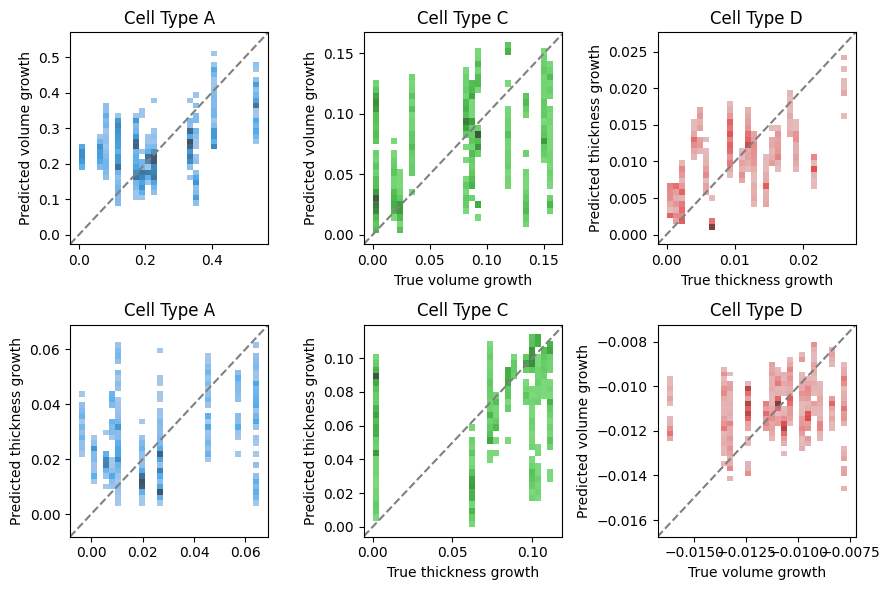

,Cell Type A,Cell Type C,Cell Type D
$R^2$,-0.31 +/- 0.66,-0.46 +/- 0.52,-0.1117 +/- 0.4222
MAE,0.02 +/- 0.0,0.04 +/- 0.01,0.005 +/- 0.0008


              precision    recall  f1-score   support

         0.0       0.66      0.33      0.44       591
         1.0       0.09      0.10      0.09        90
         2.0       0.34      0.67      0.45       298

    accuracy                           0.41       979
   macro avg       0.36      0.37      0.33       979
weighted avg       0.51      0.41      0.41       979



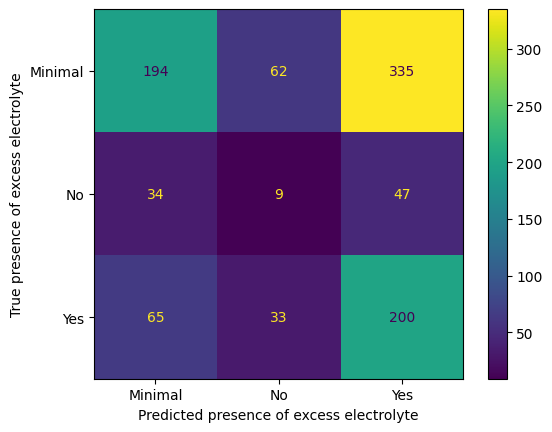

              precision    recall  f1-score   support

           0       0.83      0.73      0.77       711
           1       0.72      0.82      0.77       607

    accuracy                           0.77      1318
   macro avg       0.77      0.78      0.77      1318
weighted avg       0.78      0.77      0.77      1318



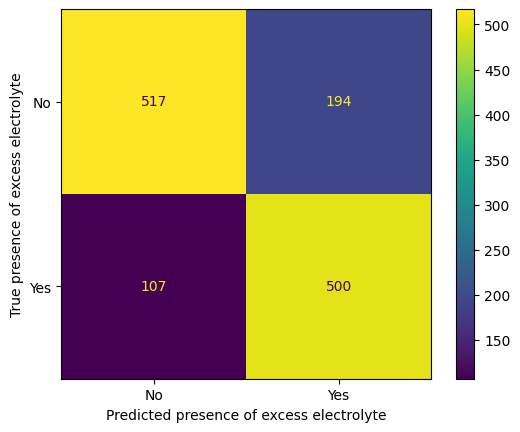

In [18]:
colors = {
    "A": (50/225, 116/225, 161/225),
    "B": (225/225, 129/225, 44/225),
    "C": (58/225, 146/225, 58/225),
    "D": (192/225, 61/225, 62/225),
}

targets = [
    "Volume growth",
    "Thickness growth",
]

fig, axes = plt.subplots(2,3, figsize=(9,6))
ax = axes.ravel()
plot_true_vs_pred_axis(ax[0], 'Static PsRP 1', "Volume growth", A_volume, color=colors['A'], title="Cell Type A");  # #1f77b4
ax[0].set_ylabel("Predicted volume growth")
ax[0].set_xlabel("")

plot_true_vs_pred_axis(ax[1], 'Static PsRP 1', "Volume growth", C_volume, color=colors['C'], title="Cell Type C");  # #1f77b4
ax[1].set_ylabel("Predicted volume growth")
ax[1].set_xlabel("True volume growth")

plot_true_vs_pred_axis(ax[3], 'Static PsRP 1', "Thickness growth", A_volume, color=colors['A'], title="Cell Type A");  # #1f77b4
ax[3].set_ylabel("Predicted thickness growth")
ax[3].set_xlabel("")

plot_true_vs_pred_axis(ax[4], 'Static PsRP 1', "Thickness growth", C_volume, color=colors['C'], title="Cell Type C");  # #1f77b4
ax[4].set_xlabel("True thickness growth")
ax[4].set_ylabel("Predicted thickness growth")

plot_true_vs_pred_axis(ax[2], 'Static PsRP 1', "Thickness growth", D_volume, color=colors['D'], title="Cell Type D");  # #1f77b4
ax[2].set_xlabel("True thickness growth")
ax[2].set_ylabel("Predicted thickness growth")

plot_true_vs_pred_axis(ax[5], 'Static PsRP 1', "Volume growth", D_volume, color=colors['D'], title="Cell Type D");  # #1f77b4
ax[5].set_xlabel("True volume growth")
ax[5].set_ylabel("Predicted volume growth")

fig.tight_layout()
plt.show()

a = plot_scatter_one_target(['Static PsRP 1'], ["Thickness growth"], A_volume, plot=False)
c = plot_scatter_one_target(['Static PsRP 1'], ["Thickness growth"], C_volume, plot=False)
d = plot_scatter_one_target(['Static PsRP 1'], ["Thickness growth"], D_volume, plot=False)

display(pd.DataFrame({
    'Cell Type A': [f"{a['r2']['mean'][0].round(2)} +/- {a['r2']['std'][0].round(2)}",
          f"{a['mae']['mean'][0].round(2)} +/- {a['mae']['std'][0].round(2)}"],
    'Cell Type C': [f"{c['r2']['mean'][0].round(2)} +/- {c['r2']['std'][0].round(2)}",
          f"{c['mae']['mean'][0].round(2)} +/- {c['mae']['std'][0].round(2)}"],
    'Cell Type D': [f"{d['r2']['mean'][0].round(4)} +/- {d['r2']['std'][0].round(4)}",
          f"{d['mae']['mean'][0].round(4)} +/- {d['mae']['std'][0].round(4)}"]
}, index=[r'$R^2$', 'MAE']))

get_classification_scores('Static PsRP 1', 'Excess electrolyte', C_elec, xlabel='Predicted presence of excess electrolyte', ylabel='True presence of excess electrolyte', display_labels=['Minimal', 'No', 'Yes'])
get_classification_scores('Static PsRP 1', 'Excess electrolyte', D_elec, xlabel='Predicted presence of excess electrolyte', ylabel='True presence of excess electrolyte',display_labels=['No', 'Yes'])

## Results with a benchmark model

that uses only 3 features (V0, V0/I, T)

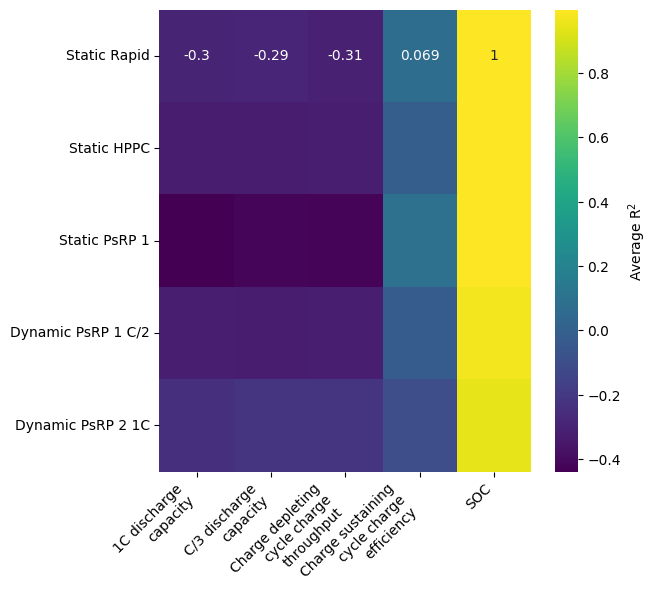

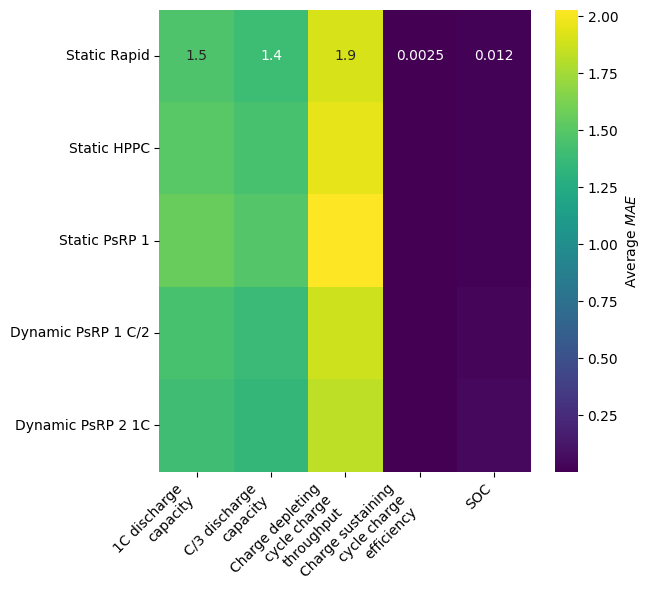

In [20]:
# Benchmark regression results

pulses = [
    "Static Rapid",
    "Static HPPC",
    "Static PsRP 1",
    "Dynamic PsRP 1 C/2",
    "Dynamic PsRP 2 1C"
]

targets = [
    "1C discharge capacity",
    "C/3 discharge capacity",
    "Charge depleting cycle charge throughput",
    "Charge sustaining cycle charge efficiency",
    "soc",
]

plot_heatmap(pulses, targets, C_benchmark, metric='r2');
plot_heatmap(pulses, targets, C_benchmark, metric='mae');

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90       314
         1.0       0.41      0.55      0.47        49

    accuracy                           0.83       363
   macro avg       0.67      0.71      0.68       363
weighted avg       0.86      0.83      0.84       363



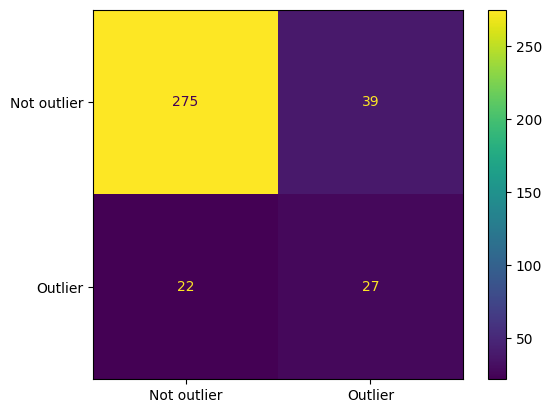

In [21]:
# Benchmark classification results

pulses = [
#     "Static Rapid",
#     "Static HPPC",
    "Static PsRP 1",
#     "Dynamic PsRP 1 C/2",
#     "Dynamic PsRP 2 1C"
]

targets = [
#     "1C discharge capacity_3bins",
    "Post 1C charge relaxation fit MSE_outlier",
#     "C/3 discharge capacity_3bins",
#     "Post C/2 charge relaxation fit MSE_outlier",
#     "Post 1C or Post C/2_outlier",
]

for pulse in pulses:
    get_classification_scores(pulse, targets[0], B_safety_1c, display_labels=['Not outlier', 'Outlier'])  # C_benchmark

## Results on all pulses, all targets

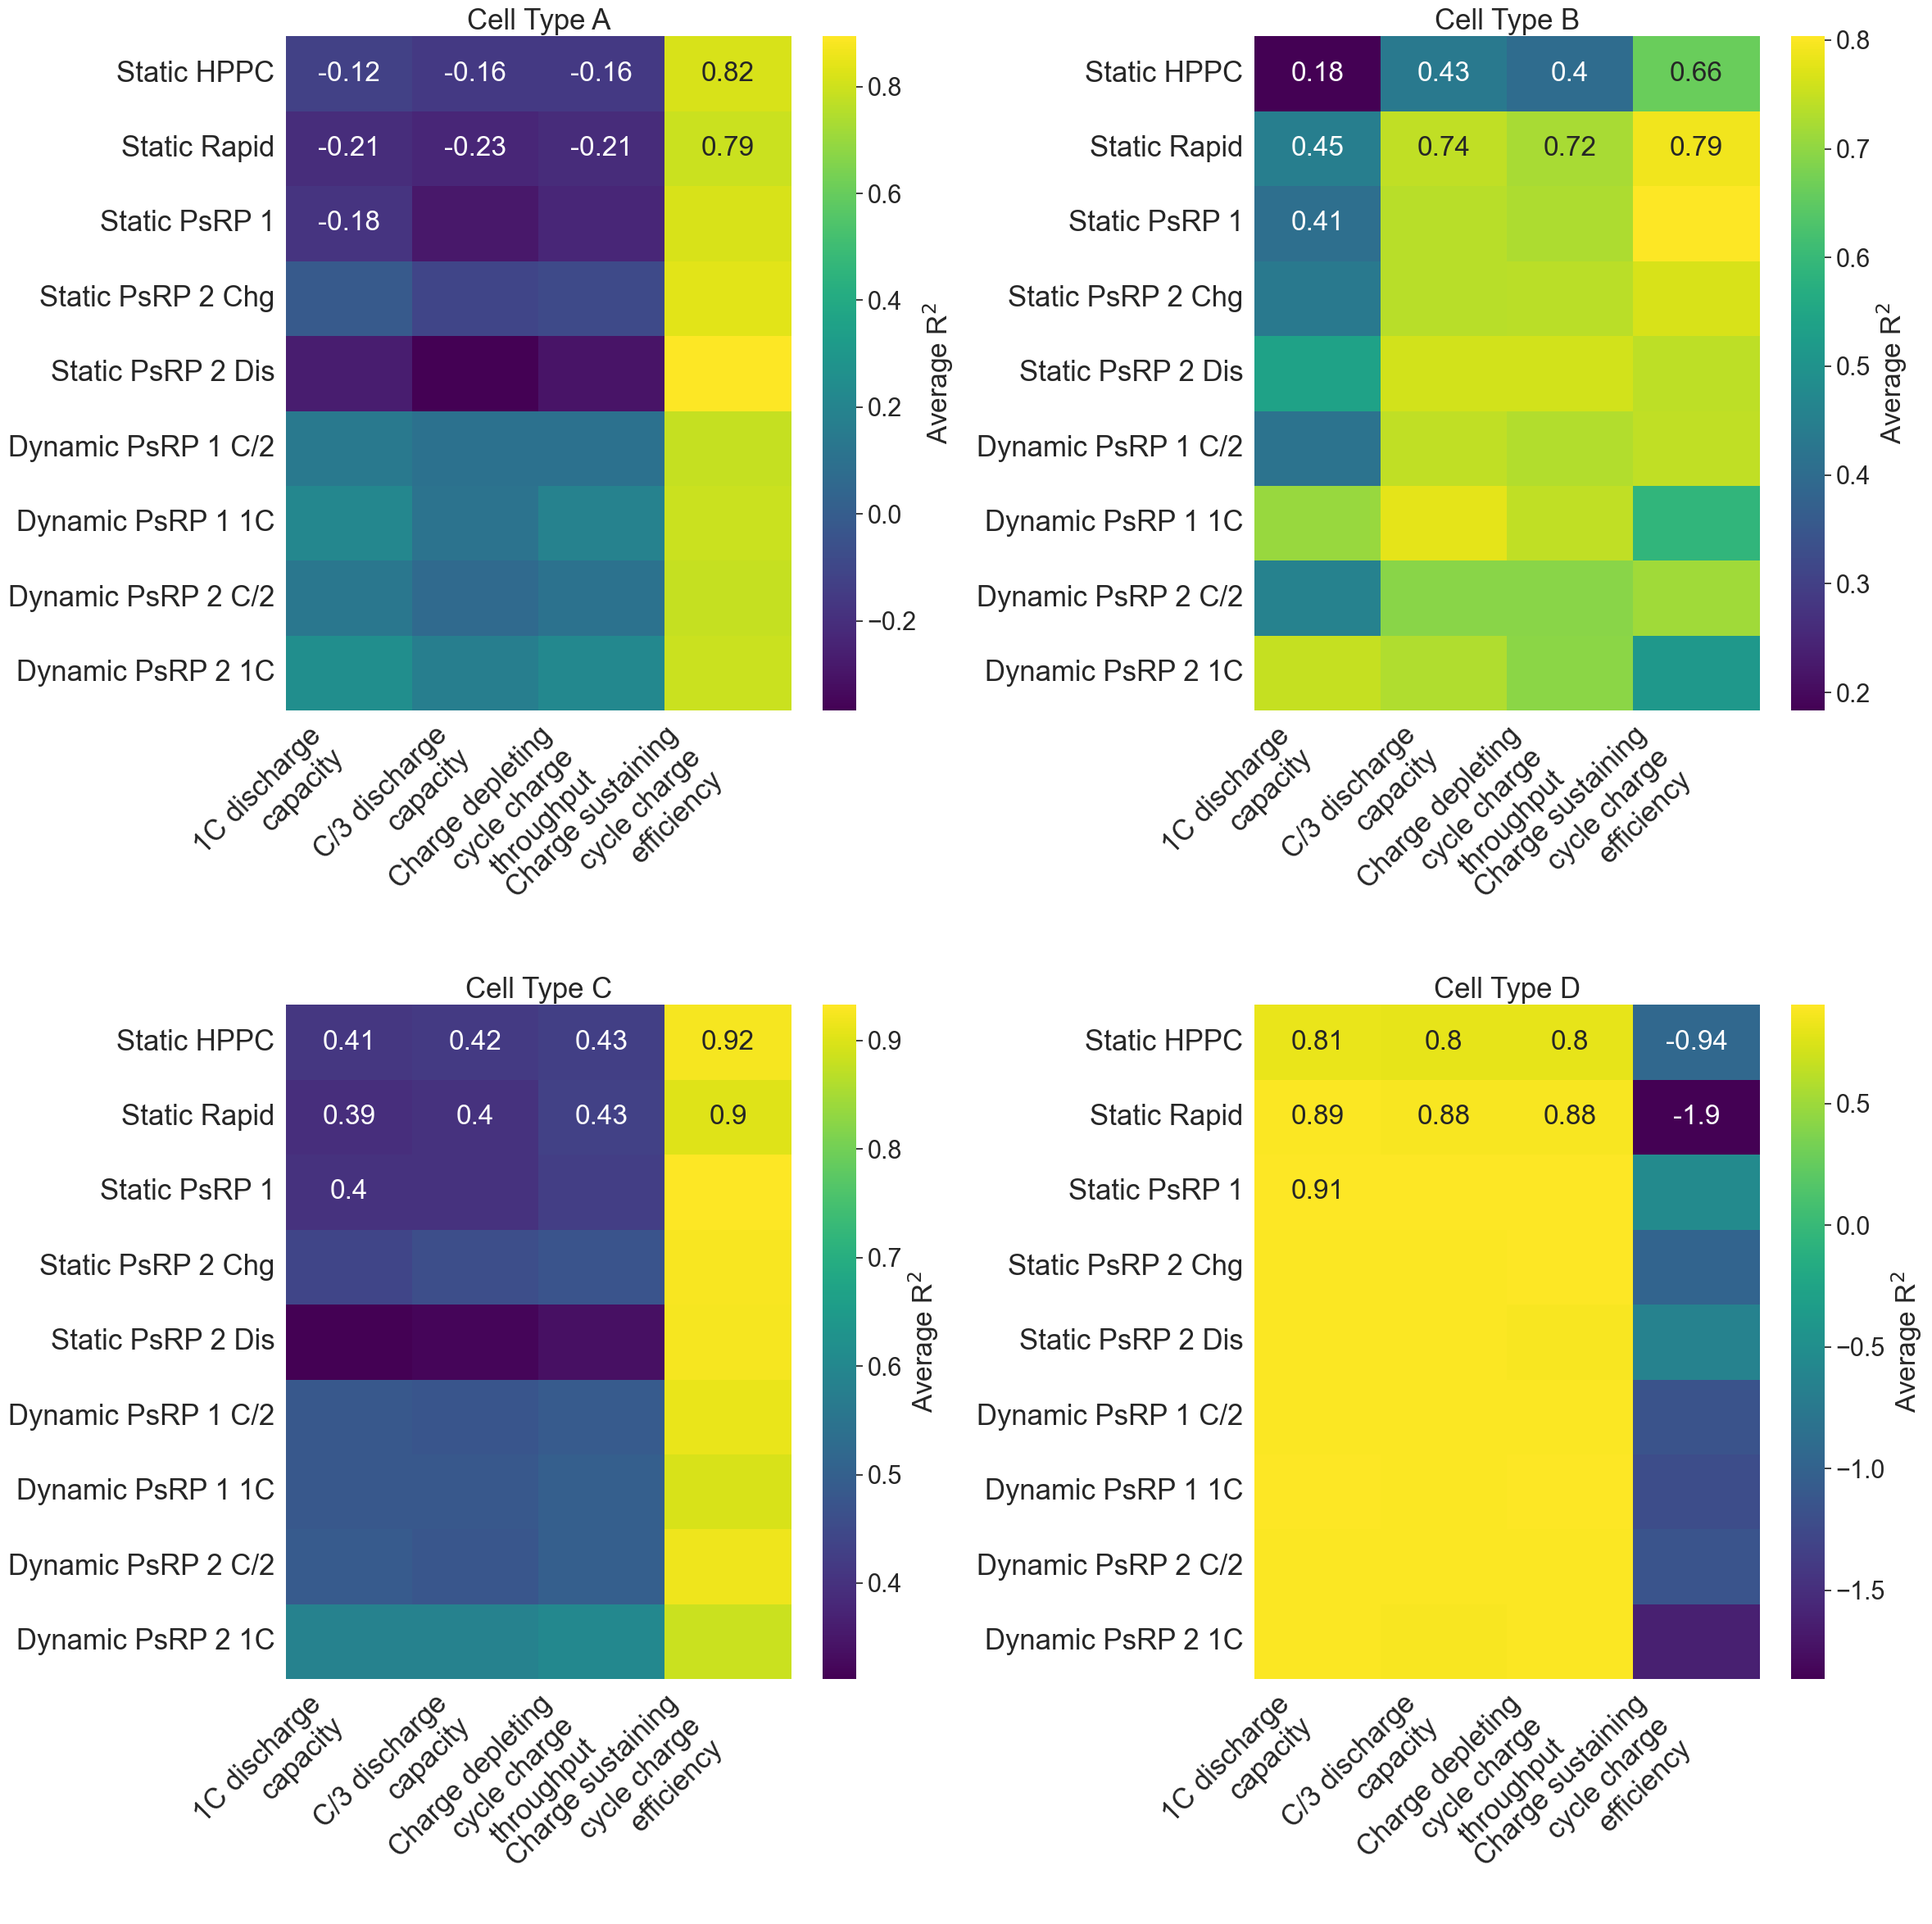

In [37]:
pulses = [
        'Static HPPC',
        'Static Rapid',
        'Static PsRP 1',
        'Static PsRP 2 Chg',
        'Static PsRP 2 Dis',
        'Dynamic PsRP 1 C/2',
        'Dynamic PsRP 1 1C',
        'Dynamic PsRP 2 C/2',
        'Dynamic PsRP 2 1C',
]

targets = [
    "1C discharge capacity",
    "C/3 discharge capacity",
    "Charge depleting cycle charge throughput",
    "Charge sustaining cycle charge efficiency",
#     "soc",
]

fig, ax = plt.subplots(2,2, figsize=(24,24))
ax = ax.ravel()
sns.set(font_scale=2)
plot_heatmap(pulses, targets, A, metric='r2', ax=ax[0]);
plot_heatmap(pulses, targets, B, metric='r2', ax=ax[1]);
plot_heatmap(pulses, targets, C, metric='r2', ax=ax[2]);
plot_heatmap(pulses, targets, D, metric='r2', ax=ax[3]);
for a in ax:
    a.tick_params(axis='both', which='major', labelsize=25)
ax[0].set_title("Cell Type A", fontsize=25)
ax[1].set_title("Cell Type B", fontsize=25)
ax[2].set_title("Cell Type C", fontsize=25)
ax[3].set_title("Cell Type D", fontsize=25)
fig.tight_layout()
plt.show()
sns.set(font_scale=1)

## Average metrics per cell type

In [26]:
get_table_multiple_chemistries('Dynamic PsRP 2 1C', 'Charge depleting cycle charge throughput', A, B, C)

,$R^2$,MAE,Maximum error
A,0.222229,2.833390,11.086475
B,0.695931,3.955556,21.195344
C,0.602072,0.745686,3.649522


In [27]:
get_table_multiple_chemistries('Dynamic PsRP 2 1C', '1C discharge capacity', A, B, C_discharge_redo)

,$R^2$,MAE,Maximum error
A,0.251467,2.016932,8.232672
B,0.748110,3.186321,16.481818
C,0.597200,0.826292,3.846893


## Plotting true vs. predicted values

C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


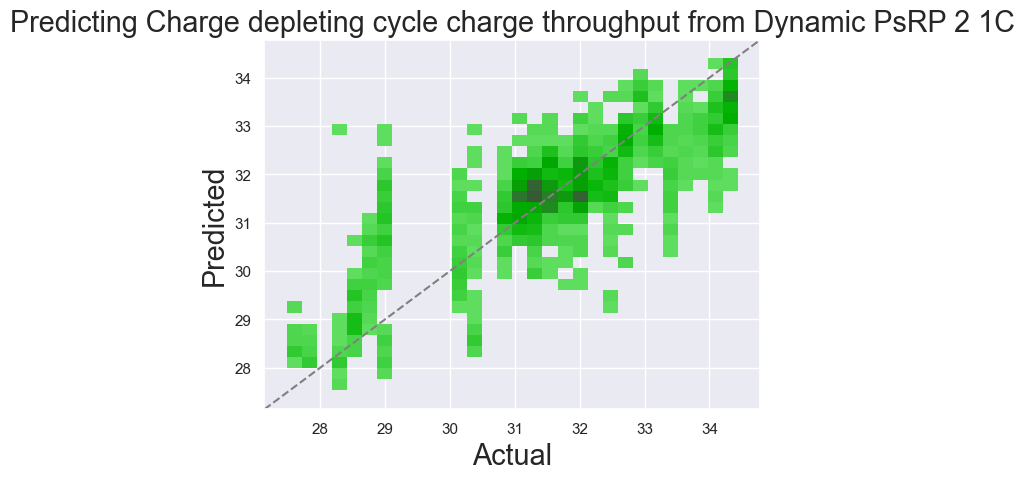

r2 score:  0.6742842583959467
mae score:  0.6944541585941504
max error:  4.629568897840709


In [38]:
plot_true_vs_pred('Dynamic PsRP 2 1C', 'Charge depleting cycle charge throughput', C, color='green')  # #1f77b4

## Plotting residual errors

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1851967302.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(x=means.index, y=means['target-average_pred'], yerr=stds['target-average_pred'], color=color,


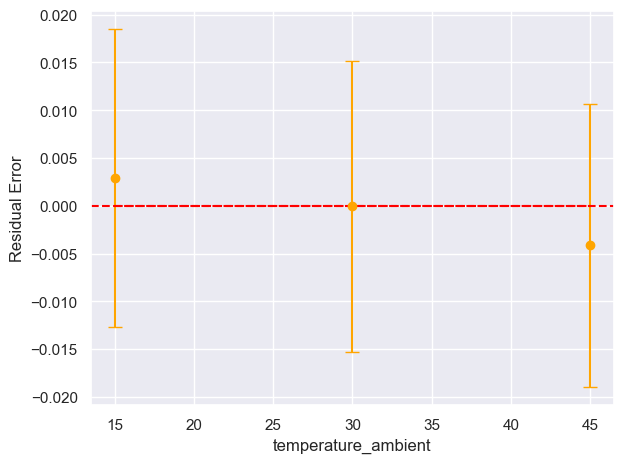

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1851967302.py:42: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(x=means.index, y=means['target-average_pred'], yerr=stds['target-average_pred'], color=color,


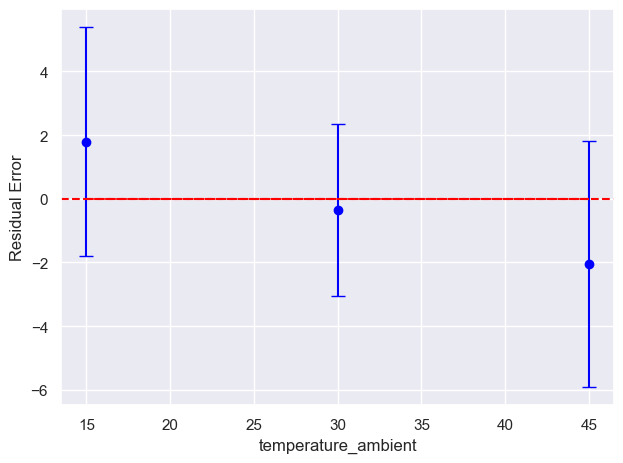

In [39]:
plot_residuals_errorbar('Static PsRP 1', 'soc', 'temperature_ambient', A_soc, color='orange')  # #1f77b4
plot_residuals_errorbar('Static PsRP 1', 'C/3 discharge capacity', 'temperature_ambient', B, color='blue')  # #1f77b4

## Plotting distribution of scores per pulse type for a single target

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\3324559511.py:35: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(x=pulses, y=r2s_mean, yerr=r2s_std, capsize=5, fmt='bo', color=color)


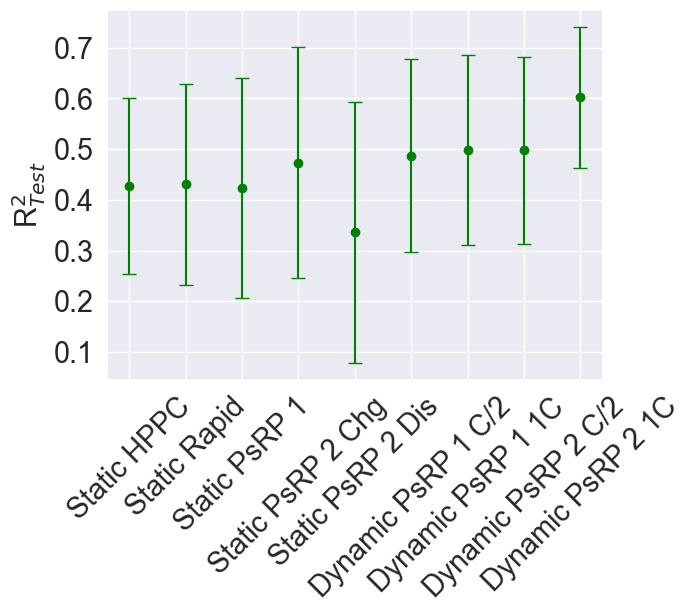

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\3324559511.py:41: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(x=pulses, y=maes_mean, yerr=maes_std, capsize=5, fmt='bo', color=color)


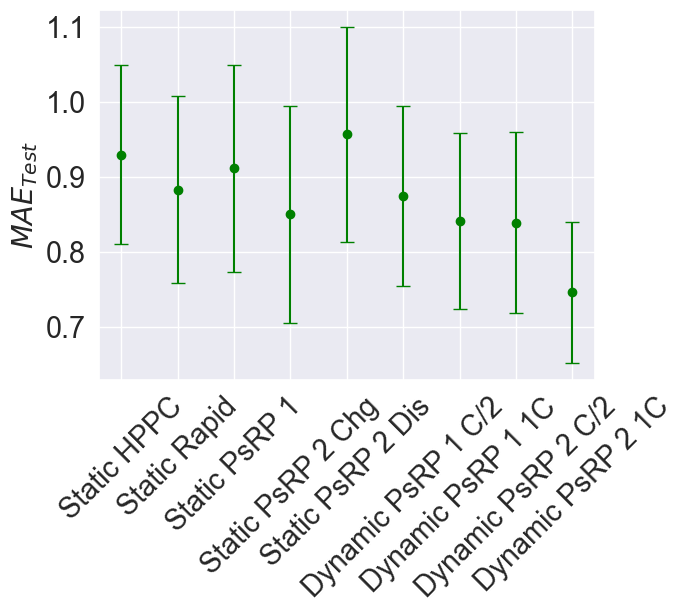

In [40]:
pulses = [
        'Static HPPC',
        'Static Rapid',
        'Static PsRP 1',
        'Static PsRP 2 Chg',
        'Static PsRP 2 Dis',
        'Dynamic PsRP 1 C/2',
        'Dynamic PsRP 1 1C',
        'Dynamic PsRP 2 C/2',
        'Dynamic PsRP 2 1C',
]

plot_scatter_one_target(pulses, ['Charge depleting cycle charge throughput'], C, color='green');  # #1f77b4

## Results predicting safety with sample weighting

              precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      1554
         1.0       0.14      0.26      0.18       135

    accuracy                           0.81      1689
   macro avg       0.53      0.56      0.54      1689
weighted avg       0.87      0.81      0.84      1689



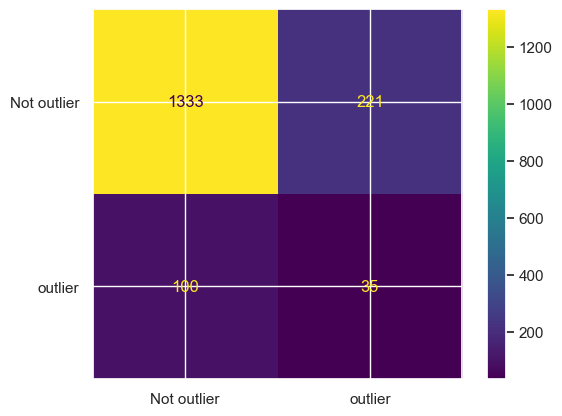

In [41]:
pulses = [
        'Static HPPC',
        'Static Rapid',
        'Static PsRP 1',
        'Dynamic PsRP 1 C/2',
        'Dynamic PsRP 2 1C'
]

pulse = pulses[4]
target = 'Post C/2 charge relaxation fit MSE_outlier'

get_classification_scores(pulse, target, C_safety_weighting_and_cap_3bins, display_labels=['Not outlier', 'outlier'])

## Results predicting safety without sample weighting

              precision    recall  f1-score   support

           0       0.84      0.77      0.81       792
           1       0.09      0.13      0.10       130

    accuracy                           0.68       922
   macro avg       0.47      0.45      0.46       922
weighted avg       0.74      0.68      0.71       922



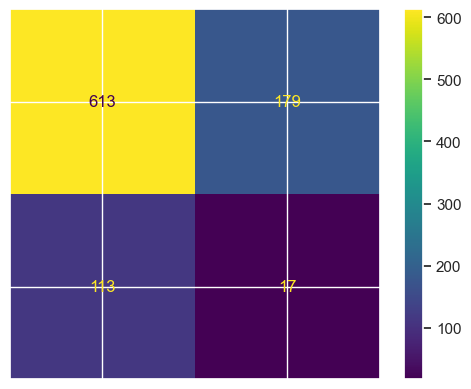

In [42]:
pulses = [
        'Static HPPC',
        'Static Rapid',
        'Static PsRP 1',
        'Dynamic PsRP 1 C/2',
]

pulse = pulses[1]

# get_classification_scores(pulse, 'Post 1C charge relaxation fit MSE_outlier', B_safety_1c)
# get_classification_scores(pulse, 'Post C/2 charge relaxation fit MSE_outlier', B_safety_c_2)
get_classification_scores(pulse, 'Post 1C or Post C/2_outlier', A_safety_c_2)

## Results predicting discharge capacity as a classification rather than regression

              precision    recall  f1-score   support

           0       0.48      0.02      0.05       628
           1       0.42      0.28      0.34      1499
           2       0.76      0.93      0.84      4807

    accuracy                           0.71      6934
   macro avg       0.55      0.41      0.41      6934
weighted avg       0.66      0.71      0.66      6934



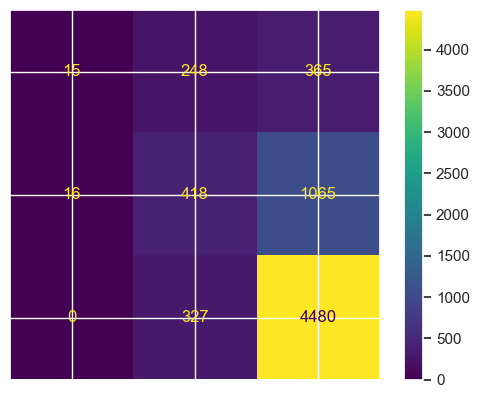

              precision    recall  f1-score   support

           0       0.94      0.03      0.06       564
           1       0.53      0.33      0.41      1487
           2       0.77      0.95      0.85      4883

    accuracy                           0.74      6934
   macro avg       0.75      0.44      0.44      6934
weighted avg       0.73      0.74      0.69      6934



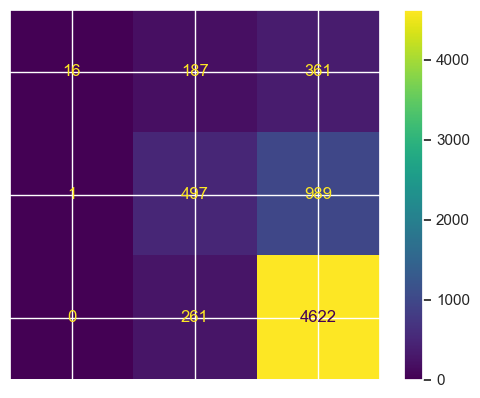

In [43]:
pulses = [
        'Static HPPC',
        'Static Rapid',
        'Static PsRP 1',
        'Dynamic PsRP 1 C/2',
        'Dynamic PsRP 2 1C'
]

pulse = pulses[0]
get_classification_scores(pulse, '1C discharge capacity_3bins', C_safety_weighting_and_cap_3bins)
get_classification_scores(pulse, 'C/3 discharge capacity_3bins', C_safety_weighting_and_cap_3bins)

              precision    recall  f1-score   support

         0.0       0.89      0.73      0.81       701
         1.0       0.50      0.76      0.61       251

    accuracy                           0.74       952
   macro avg       0.70      0.75      0.71       952
weighted avg       0.79      0.74      0.75       952



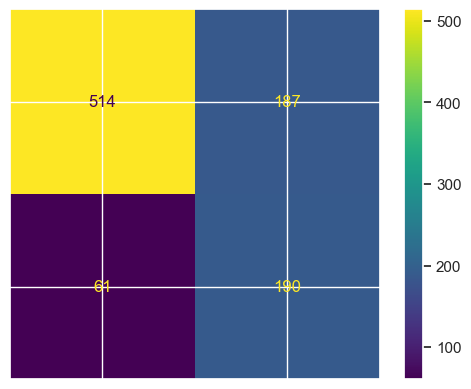

              precision    recall  f1-score   support

         0.0       0.74      0.58      0.65       575
         1.0       0.52      0.69      0.59       377

    accuracy                           0.62       952
   macro avg       0.63      0.64      0.62       952
weighted avg       0.65      0.62      0.63       952



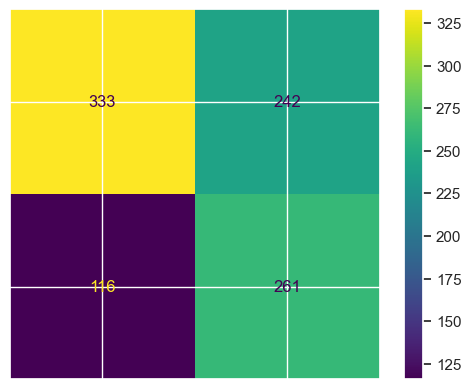

In [44]:
pulses = [
        'Static HPPC',
        'Static Rapid',
        'Static PsRP 1',
        'Dynamic PsRP 1 C/2',
]

pulse = pulses[3]
get_classification_scores(pulse, '1C discharge capacity>threshold', A_capacity_bins)
get_classification_scores(pulse, 'C/3 discharge capacity>threshold', A_capacity_bins)

## Results predicting targets with and without current (I) variable

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1469759590.py:52: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1469759590.py:57: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1469759590.py:63: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_yticklabels(


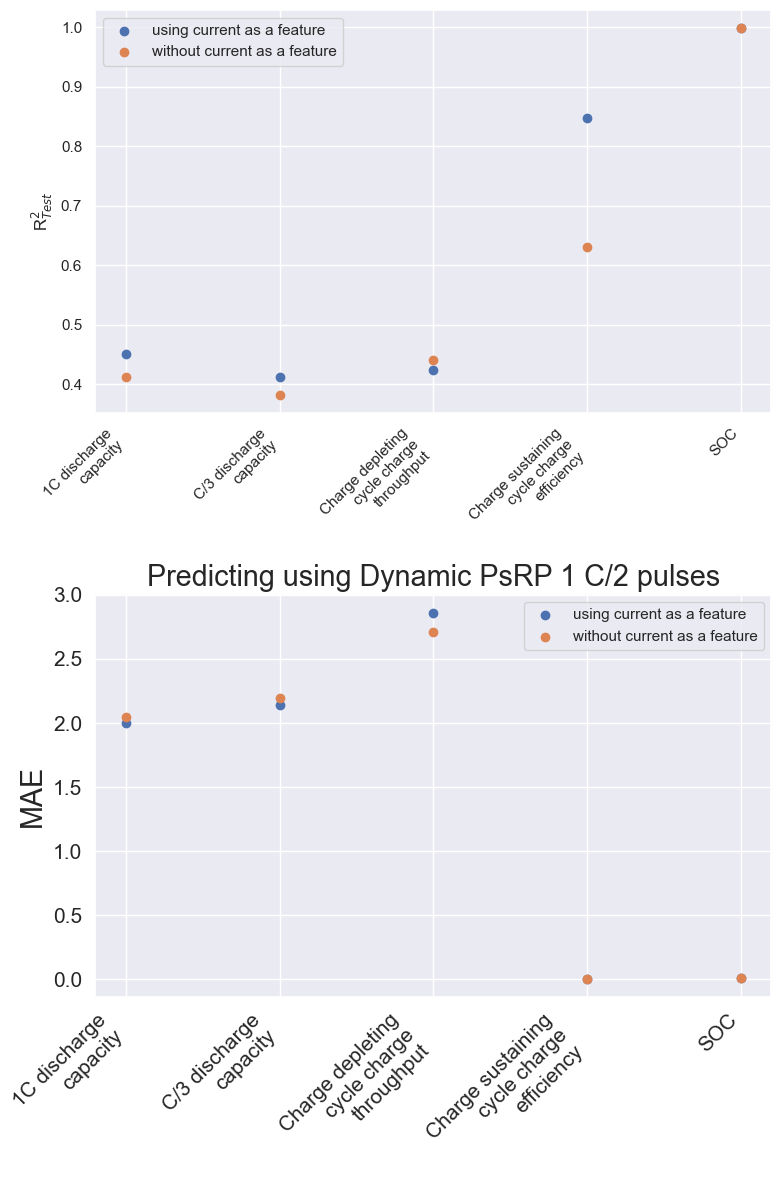

In [49]:
A_no_current = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_no_current_A_only.pth")
B_no_current = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_no_current_B_only.pth")
C_no_current = torch.load("../../results/RESULTS_xgboost_cells_A-C/bootstrap_results_no_current_C_only.pth")

pulses = [
    "Static Rapid",
    "Static HPPC",
    "Static PsRP 1",
    "Dynamic PsRP 1 C/2"
]

targets = [
    "1C discharge capacity",
    "C/3 discharge capacity",
    "Charge depleting cycle charge throughput",
    "Charge sustaining cycle charge efficiency",
    "soc",
]

def plot_results_with_and_without_current(current, no_current, current_soc, pulse, targets, n_splits=50):
    
    r2s_current, maes_current = [], []
    r2s_no_current, maes_no_current = [], []

    for target in targets:
        if target == 'soc':
            df_current = current_soc[f"{target}, {pulse}"]
        else:
            df_current = current[f"{target}, {pulse}"]
        
        df_no_current = no_current[f"{target}, {pulse}"]
        
        average_pred = df_current[list(range(n_splits))].mean(axis=1)
        r2s_current.append(r2_score(df_current[target], average_pred))
        maes_current.append(mean_absolute_error(df_current[target], average_pred))
        
        average_pred = df_no_current[list(range(n_splits))].mean(axis=1)
        r2s_no_current.append(r2_score(df_no_current[target], average_pred))
        maes_no_current.append(mean_absolute_error(df_no_current[target], average_pred))

    fig, axes = plt.subplots(2,1, figsize=(8,12))
    axes[0].scatter([TARGETS_TO_NAMES[t] for t in targets], r2s_current, label='using current as a feature')
    axes[0].scatter([TARGETS_TO_NAMES[t] for t in targets], r2s_no_current, label='without current as a feature')
    axes[0].legend()
    axes[0].set_ylabel(r'R$^2_{Test}$')
    
    axes[1].scatter([TARGETS_TO_NAMES[t] for t in targets], maes_current, label='using current as a feature')
    axes[1].scatter([TARGETS_TO_NAMES[t] for t in targets], maes_no_current, label='without current as a feature')
    axes[1].legend()
    axes[1].set_ylabel(r'MAE', fontsize='xx-large')
  
    axes[0].set_xticklabels(
            axes[0].get_xticklabels(),
            rotation=45,
            horizontalalignment='right'
        );
    axes[1].set_xticklabels(
            axes[1].get_xticklabels(),
            rotation=45,
            horizontalalignment='right',
            size=15,
        );
    axes[1].set_yticklabels(
            axes[1].get_yticklabels(),
            size=15,
        );
    
    plt.title(f"Predicting using {pulse} pulses", fontsize='xx-large')
    fig.tight_layout()
    plt.show()
    
plot_results_with_and_without_current(A, A_no_current, A_soc, pulses[-1], targets)

## Results comparing raw response measurements and TSFresh extracted features as inputs

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\2493717200.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\2493717200.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\2493717200.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\2493717200.py:41: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(


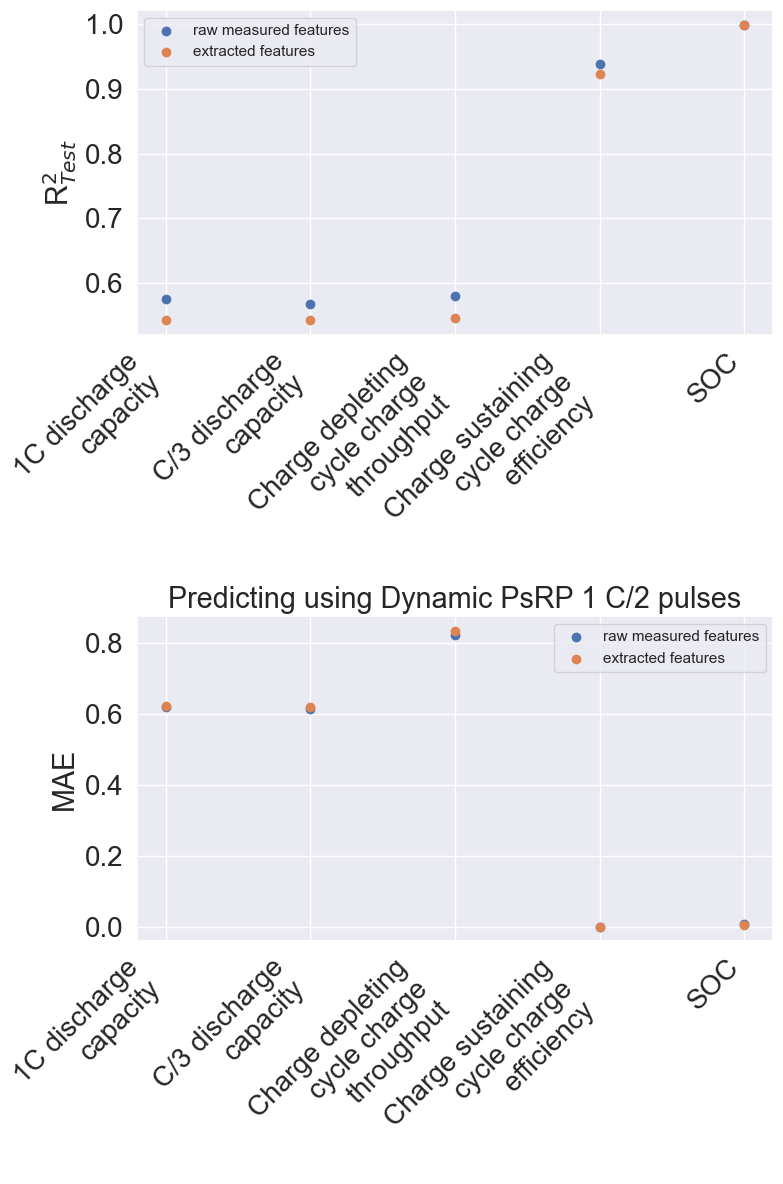

In [50]:
def plot_results_raw_vs_extracted(raw, extracted, raw_soc, pulse, targets, n_splits=50, n_splits_extracted=5):
    
    r2s_raw, maes_raw = [], []
    r2s_extracted, maes_extracted = [], []

    for target in targets:
        
        if target == 'soc':
            df_raw = raw_soc[f"{target}, {pulse}"]  
        else:
            df_raw = raw[f"{target}, {pulse}"]
        df_extracted = extracted[f"{target}, {pulse}"]
        
        average_pred = df_raw[list(range(n_splits))].mean(axis=1)
        r2s_raw.append(r2_score(df_raw[target], average_pred))
        maes_raw.append(mean_absolute_error(df_raw[target], average_pred))
        
        average_pred = df_extracted[list(range(n_splits_extracted))].mean(axis=1)
        mask = average_pred.notna()
        r2s_extracted.append(r2_score(df_extracted[mask][target], average_pred[mask]))
        maes_extracted.append(mean_absolute_error(df_extracted[mask][target], average_pred[mask]))

    fig, axes = plt.subplots(2,1, figsize=(8,12))
    axes[0].scatter([TARGETS_TO_NAMES[t] for t in targets], r2s_raw, label='raw measured features')
    axes[0].scatter([TARGETS_TO_NAMES[t] for t in targets], r2s_extracted, label='extracted features')
    axes[0].legend()
    axes[0].set_ylabel(r'R$^2_{Test}$', fontsize='xx-large')
    
    axes[1].scatter([TARGETS_TO_NAMES[t] for t in targets], maes_raw, label='raw measured features')
    axes[1].scatter([TARGETS_TO_NAMES[t] for t in targets], maes_extracted, label='extracted features')
    axes[1].legend()
    axes[1].set_ylabel(r'MAE', fontsize='xx-large')
  
    for ax in axes:
        ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=45,
            horizontalalignment='right',
            size=20,
        );
        ax.set_yticklabels(
            ax.get_yticklabels(),
            size=20,
        );

    plt.title(f"Predicting using {pulse} pulses", fontsize='xx-large')
    fig.tight_layout()
    plt.show()

pulses = [
    "Static Rapid",
    "Static HPPC",
    "Static PsRP 1",
    "Dynamic PsRP 1 C/2"
]

targets = [
    "1C discharge capacity",
    "C/3 discharge capacity",
    "Charge depleting cycle charge throughput",
    "Charge sustaining cycle charge efficiency",
    "soc",
]

plot_results_raw_vs_extracted(C, C_extracted, C_soc, pulses[-1], targets)

## Results using cell-specific model vs. model trained on all cells

In [53]:
def plot_results_global_vs_stratified(global_results, A, B, C, global_results_soc, A_soc, B_soc, C_soc, pulse, targets, n_splits=50):
    
    r2s_global, maes_global = [], []
    r2s_A, maes_A = [], []
    r2s_B, maes_B = [], []
    r2s_C, maes_C = [], []

    for target in targets:
        if target == 'soc':
            df_A = A_soc[f"{target}, {pulse}"]
            df_B = B_soc[f"{target}, {pulse}"]
            df_C = C_soc[f"{target}, {pulse}"]
            df_global = global_results_soc[f"{target}, {pulse}"]

        else:
            df_A = A[f"{target}, {pulse}"]
            df_B = B[f"{target}, {pulse}"]
            df_C = C[f"{target}, {pulse}"]
            df_global = global_results[f"{target}, {pulse}"]
        
        average_pred = df_global[list(range(n_splits))].mean(axis=1)
        r2s_global.append(r2_score(df_global[target], average_pred))
        maes_global.append(mean_absolute_error(df_global[target], average_pred))
        
        average_pred = df_A[list(range(n_splits))].mean(axis=1)
        r2s_A.append(r2_score(df_A[target], average_pred))
        maes_A.append(mean_absolute_error(df_A[target], average_pred))
        
        average_pred = df_B[list(range(n_splits))].mean(axis=1)
        r2s_B.append(r2_score(df_B[target], average_pred))
        maes_B.append(mean_absolute_error(df_B[target], average_pred))
        
        average_pred = df_C[list(range(n_splits))].mean(axis=1)
        r2s_C.append(r2_score(df_C[target], average_pred))
        maes_C.append(mean_absolute_error(df_C[target], average_pred))

    fig, axes = plt.subplots(2,1, figsize=(8,12))
    s=100
    axes[0].scatter([TARGETS_TO_NAMES[t] for t in targets], r2s_global, label='All cells', s=s)
    axes[0].scatter([TARGETS_TO_NAMES[t] for t in targets], r2s_A, label='A cells only', s=s, c="#52315A")
    axes[0].scatter([TARGETS_TO_NAMES[t] for t in targets], r2s_B, label='Nissan Leaf cells only', s=s, c="#21918C")
    axes[0].scatter([TARGETS_TO_NAMES[t] for t in targets], r2s_C, label='C cells only', s=s, c="#FDE72E")

    axes[0].legend()
    axes[0].set_ylabel(r'R$^2_{Test}$', fontsize='xx-large')
    
    axes[1].scatter([TARGETS_TO_NAMES[t] for t in targets], maes_global, label='All cells', s=s)
    axes[1].scatter([TARGETS_TO_NAMES[t] for t in targets], maes_A, label='A cells only', s=s, c="#52315A")
    axes[1].scatter([TARGETS_TO_NAMES[t] for t in targets], maes_B, label='Nissan Leaf cells only', s=s, c="#21918C")
    axes[1].scatter([TARGETS_TO_NAMES[t] for t in targets], maes_C, label='C cells only', s=s, c="#FDE72E")

    axes[1].legend()
    axes[1].set_ylabel(r'MAE', fontsize='xx-large')
  
    for ax in axes:
        ax.set_xticklabels(
                ax.get_xticklabels(),
                rotation=45,
                horizontalalignment='right',
                size=15,
            );
        ax.set_yticklabels(
                ax.get_yticklabels(),
                size=15,
            );
    
    plt.title(f"Predicting using {pulse} pulses", fontsize='xx-large')
    fig.tight_layout()
    plt.show()

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\3684924169.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\3684924169.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\3684924169.py:56: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\3684924169.py:62: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(


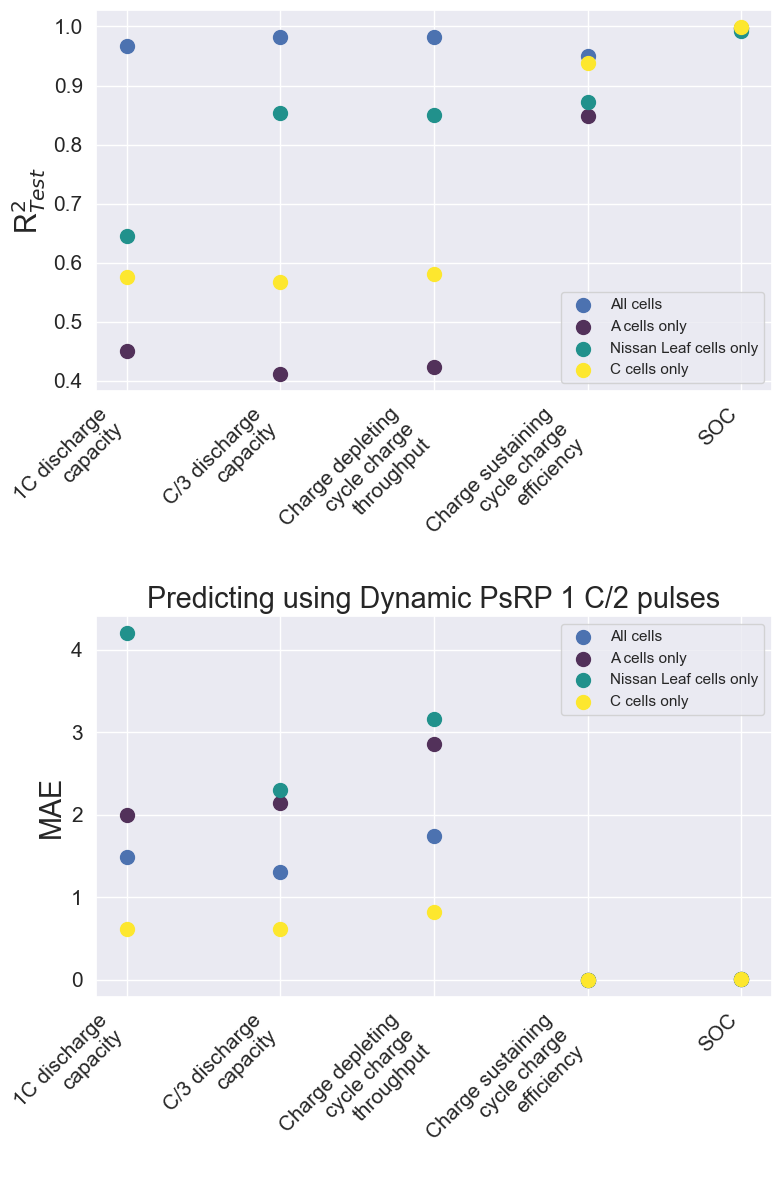

In [54]:
pulses = [
    "Static Rapid",
    "Static HPPC",
    "Static PsRP 1",
    "Dynamic PsRP 1 C/2"
]

targets = [
    "1C discharge capacity",
    "C/3 discharge capacity",
    "Charge depleting cycle charge throughput",
    "Charge sustaining cycle charge efficiency",
    "soc",
]

plot_results_global_vs_stratified(global_results, A, B, C, global_results_soc, A_soc, B_soc, C_soc, pulses[-1], targets, n_splits=50)

In [55]:
TYPE_TO_INT_MAP = {
    'A': 0,
    'B': 1,
    'C': 2,
}

def plot_true_vs_pred_scatter(pulse, targets, result_dict, result_dict_soc, n_splits=50):
    fig, axes = plt.subplots(nrows=1, ncols=len(targets), figsize=(12, 4))
    for j, target in enumerate(targets):

        if target == 'soc':
            df = result_dict_soc[f"{target}, {pulse}"]
        else:
            df = result_dict[f"{target}, {pulse}"]
        cell_type = [TYPE_TO_INT_MAP[split[0]] for split in df['cell_id'].str.split('_')]
        average_pred = df[list(range(n_splits))].mean(axis=1)

        if len(np.unique(cell_type)) == 1:
            axes[j].scatter(df[target],
                y=average_pred,
                s=2)
        else:
            axes[j].scatter(df[target],
                                y=average_pred,
                                c=cell_type,
                                s=2)
        axes[j].axline( (df[target].min(), df[target].min()),
                           (df[target].max(), df[target].max())
                         )
        axes[j].set_title(TARGETS_TO_NAMES[target], size='xx-large')
        
    for ax in axes:
        ax.set_xticklabels(
                ax.get_xticklabels(),
                size=15,
            );
        ax.set_yticklabels(
                ax.get_yticklabels(),
                size=15,
            );

    fig.text(-0.02, 0.5, 'Predicted', va='center', rotation='vertical', size='xx-large');
    fig.text(0.5, -0.04, 'Actual', ha='center', size='xx-large');
    fig.tight_layout()
    plt.show()
    

def plot_true_vs_pred_lmplot(pulse, target, result_dict, n_splits=50):

        df = result_dict[f"{target}, {pulse}"]
#         cell_type = [TYPE_TO_INT_MAP[split[0]] for split in df['cell_id'].str.split('_')]
        cell_type = [split[0] for split in df['cell_id'].str.split('_')]
        average_pred = df[list(range(n_splits))].mean(axis=1)
        
        df['average_pred'] = average_pred
        df['cell_type'] = cell_type

#         sns.regplot(data=df, x=target, y='average_pred')
        sns.lmplot(data=df, x=target, y='average_pred', hue='cell_type', line_kws={'color': 'black', 'linestyle': '--'})
        plt.xlabel('True', size='xx-large')
        plt.ylabel('Predicted', size='xx-large')
        plt.xticks(size='xx-large')
        plt.yticks(size='xx-large')
        plt.title(TARGETS_TO_NAMES[target], size='xx-large')

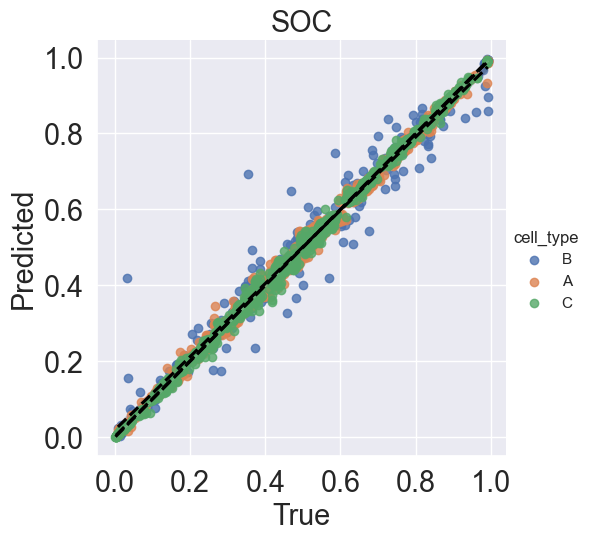

In [56]:
plot_true_vs_pred_lmplot('Dynamic PsRP 2 1C', 'soc', global_results_soc)

C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1941253588.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1941253588.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1941253588.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1941253588.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(
C:\Users\nprakash\AppData\Local\Temp\1\ipykernel_23820\1941253588.py:33: UserWarning: set_ticklabels() shoul

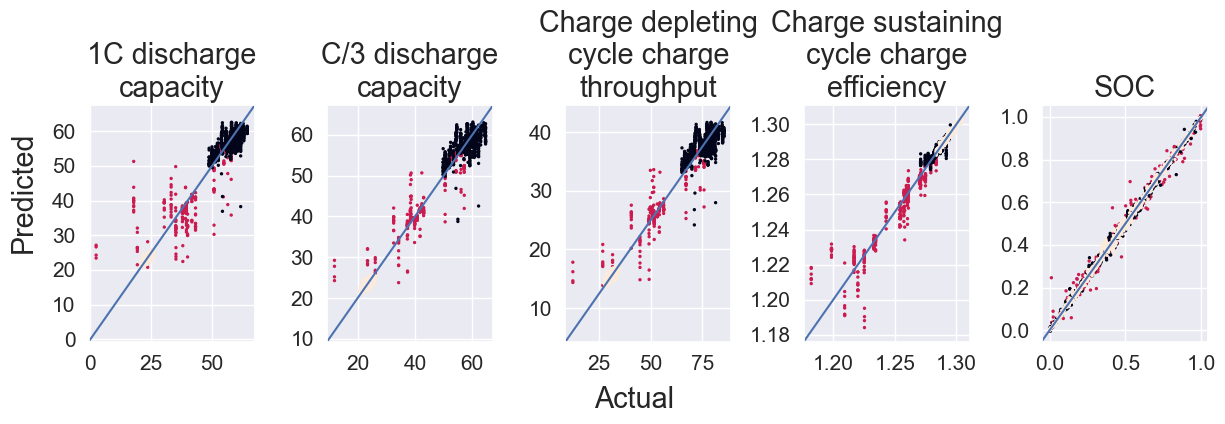

In [57]:
plot_true_vs_pred_scatter(pulses[-1], targets, global_results, global_results_soc)

### Tuning safety predictions for high recall

Safety is a binary prediction. Exploring the precision/recall tradeoff when modifying the decision threshold of a positive prediction.

In [58]:
def get_classification_scores_probs(pulse, target, result_dict, thresh=0.5, n_splits=50, plot=True, xlabel='', ylabel=''):
    df = result_dict[f"{target}, {pulse}"]
    rounded = df[list(range(n_splits))].gt(thresh).astype(int)
    rounded[df[list(range(n_splits))].isna()] = np.nan  # Put NaNs back
    average_pred = rounded.mean(axis=1)
    report = classification_report(df[target], average_pred.round(), output_dict=True)
    if plot:
        print(report)
        cm = confusion_matrix(df[target], average_pred.round())
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['not outlier', 'outlier'])
        disp.plot()
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
    
    return report

{'0.0': {'precision': 0.931454196028187, 'recall': 0.9356499356499357, 'f1-score': 0.9335473515248796, 'support': 1554.0}, '1.0': {'precision': 0.21875, 'recall': 0.2074074074074074, 'f1-score': 0.21292775665399238, 'support': 135.0}, 'accuracy': 0.8774422735346359, 'macro avg': {'precision': 0.5751020980140935, 'recall': 0.5715286715286716, 'f1-score': 0.573237554089436, 'support': 1689.0}, 'weighted avg': {'precision': 0.8744884965232698, 'recall': 0.8774422735346359, 'f1-score': 0.8759489824854658, 'support': 1689.0}}


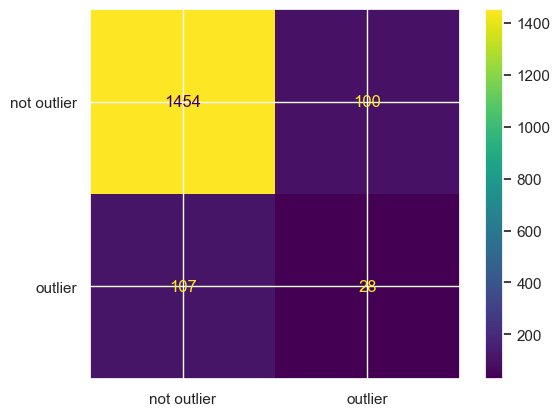

In [59]:
targets = [
    'Post 1C charge relaxation fit MSE_outlier',
    'Post C/2 charge relaxation fit MSE_outlier',
]

pulses = [
        'Static HPPC',
        'Static Rapid',
        'Static PsRP 1',
        'Dynamic PsRP 1 C/2',
        'Dynamic PsRP 2 1C',
]

target = targets[1]
pulse = pulses[-1]

# 1C, static hppc, safety_probabilities_C, thresh=0.0001

df = get_classification_scores_probs(pulse,
                                target,
                                safety_probabilities_C,
                                thresh=0.2)

### Safety - precision vs. recall tradeoff

In [60]:
def get_r_p(results):
    rs = []
    ps = []
    thresholds = np.linspace(0, 1, 100)
    for thresh in thresholds:
        if thresh % 100 == 0:
            print(thresh)
        df = get_classification_scores_probs(pulse,
                                    target,
                                    results,
                                    thresh=thresh,
                                    plot=False)

        r = df['1.0']['recall']
        p = df['1.0']['precision']
        rs.append(r)
        ps.append(p)
    return rs, ps

In [61]:
rs_A, ps_A = get_r_p(safety_probabilities_A)
rs_B, ps_B = get_r_p(safety_probabilities_B)
rs_C, ps_C = get_r_p(safety_probabilities_C)

0.0


C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

0.0


C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

0.0


C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nprakash\AppData\Anaconda\envs\recell_ml\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

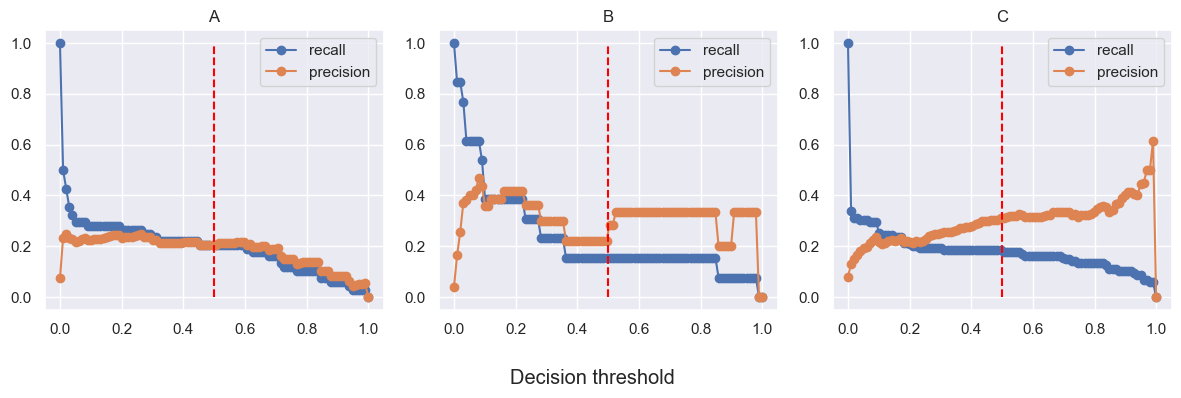

In [65]:
thresholds = np.linspace(0, 1, 100)

fig, axes = plt.subplots(1, 3, sharex=True, figsize=(12, 4))
axes[2].plot(thresholds, rs_C, '-o', label='recall')
axes[2].plot(thresholds, ps_C, '-o', label='precision')
axes[2].vlines(x=0.5, ymin=0, ymax=1, color='red', linestyle='dashed')
axes[1].plot(thresholds, rs_B, '-o', label='recall')
axes[1].plot(thresholds, ps_B, '-o', label='precision')
axes[1].vlines(x=0.5, ymin=0, ymax=1, color='red', linestyle='dashed')
axes[0].plot(thresholds, rs_A, '-o', label='recall')
axes[0].plot(thresholds, ps_A, '-o', label='precision')
axes[0].vlines(x=0.5, ymin=0, ymax=1, color='red', linestyle='dashed')
fig.supxlabel('Decision threshold')
axes[0].set_title('A')
axes[1].set_title('B')
axes[2].set_title('C')
for ax in axes:
    ax.legend()
fig.tight_layout()
plt.show()

## Comparing scores with and without temperature feature

In [4]:
A_temp = torch.load("../../results/experiment_temperature/with_temp/results_A.pth")
B_temp = torch.load("../../results/experiment_temperature/with_temp/results_B.pth")
C_temp = torch.load("../../results/experiment_temperature/with_temp/results_C.pth")

A_no_temp = torch.load("../../results/experiment_temperature/no_temp/results_A.pth")
B_no_temp = torch.load("../../results/experiment_temperature/no_temp/results_B.pth")
C_no_temp = torch.load("../../results/experiment_temperature/no_temp/results_C.pth")

In [14]:
def plot_metrics_with_and_without_temp(result_dict_temp, result_dict_no_temp, target):
    r2s_xgb, r2s_nn = [], []
    mae_xgb, mae_nn = [], []
    features = []
    for feature in result_dict_temp:
        features.append(feature)
        r2s_xgb.append(result_dict_temp[feature][target]['r2_xgb'])
        r2s_nn.append(result_dict_temp[feature][target]['r2_nn'])
        mae_xgb.append(result_dict_temp[feature][target]['mae_xgb'])
        mae_nn.append(result_dict_temp[feature][target]['mae_nn'])
        
    r2s_xgb_no_temp, r2s_nn_no_temp = [], []
    mae_xgb_no_temp, mae_nn_no_temp = [], []
    features = []
    for feature in result_dict_no_temp:
        features.append(feature)
        r2s_xgb_no_temp.append(result_dict_no_temp[feature][target]['r2_xgb'])
        r2s_nn_no_temp.append(result_dict_no_temp[feature][target]['r2_nn'])
        mae_xgb_no_temp.append(result_dict_no_temp[feature][target]['mae_xgb'])
        mae_nn_no_temp.append(result_dict_no_temp[feature][target]['mae_nn'])

    fig, axes = plt.subplots(1,2, figsize=(8,4))
    axes[0].scatter(features, r2s_xgb, label='Fitting with T')
    axes[0].scatter(features, r2s_xgb_no_temp, label='Fitting without T')

    axes[0].tick_params('x', labelrotation=90)
    axes[0].set_ylabel(r'$r^2$')
    plt.suptitle(target)
    axes[1].scatter(features, mae_xgb, label='Fitting with T')
    axes[1].scatter(features, mae_xgb_no_temp, label='Fitting without T')

    axes[1].tick_params('x', labelrotation=90) # , labelsize='xx-large')
    axes[1].set_ylabel(r'$MAE$', size='xx-large')
    
    axes[1].set_ylabel(r'$MAE$', size='xx-large')
    axes[0].legend() # prop={'size':'xx-large'})
    axes[1].legend() # prop={'size':'xx-large'})
    plt.tight_layout()
    plt.show()

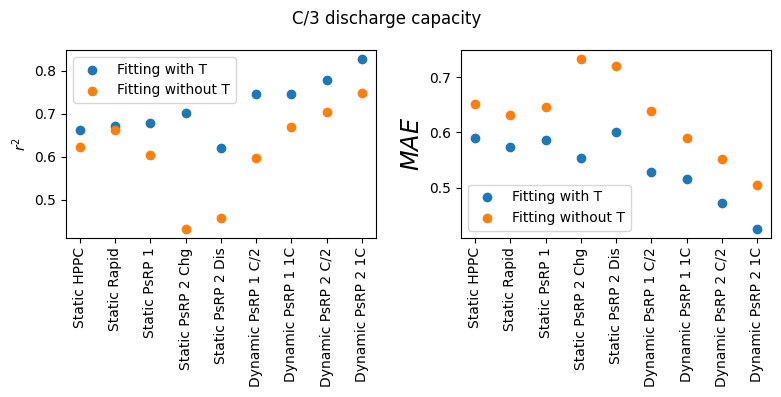

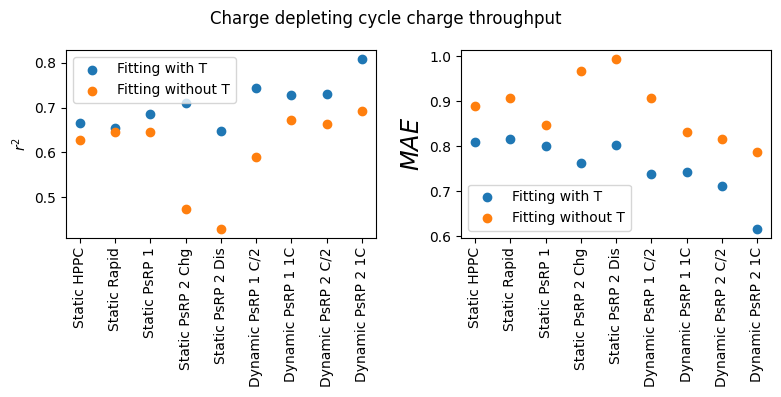

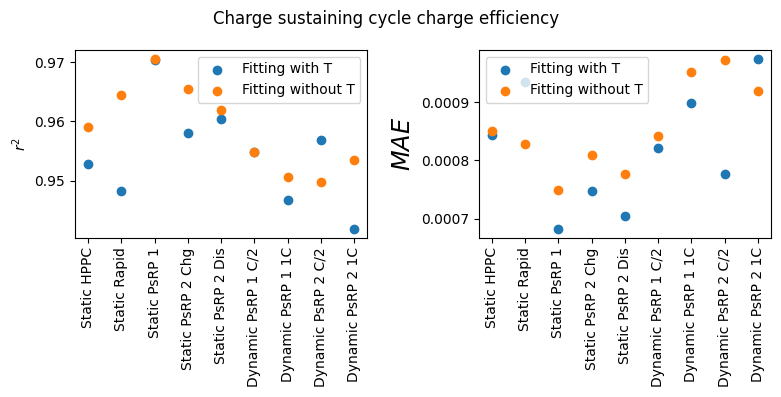

In [16]:
plot_metrics_with_and_without_temp(C_no_temp, C_temp, 'C/3 discharge capacity')
plot_metrics_with_and_without_temp(C_no_temp, C_temp, 'Charge depleting cycle charge throughput')
plot_metrics_with_and_without_temp(C_no_temp, C_temp, 'Charge sustaining cycle charge efficiency')